In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np

from IPython.display import display, HTML
display(HTML("<style>.jp-Cell { margin-left: -35% !important; margin-right: -35% !important; }</style>"))

In [2]:
def plot_and_show_statistics_(filename, bin_count):
    # CSV 파일 읽기
    data = pd.read_csv(filename)
    
    # 통계적 수치 계산
    allocation_rate_stats = data['Allocation Rate'].describe()
    utilization_rate_stats = data['Utilization Rate'].describe()
    
    print("Allocation Rate Statistics:")
    print(allocation_rate_stats)
    print("\nUtilization Rate Statistics:")
    print(utilization_rate_stats)
    
    # 그림 그릴 준비
    fig, axs = plt.subplots(2, 2, figsize=(20, 10))
    
    # Allocation Rate 히스토그램 및 KDE 그리기
    sns.histplot(data['Allocation Rate'], bins=bin_count, kde=True, ax=axs[0, 0], color='blue')
    axs[0, 0].set_title('Allocation Rate Distribution')
    
    # Utilization Rate 히스토그램 및 KDE 그리기
    sns.histplot(data['Utilization Rate'], bins=bin_count, kde=True, ax=axs[0, 1], color='green')
    axs[0, 1].set_title('Utilization Rate Distribution')
    
# 기존 하단 서브플롯 삭제
    for j in range(2):
        fig.delaxes(axs[1, j])
    
    # 새로운 하단 서브플롯 추가
    ax_combined = fig.add_subplot(212)  # 하단 전체를 차지하도록 설정
    
    x_allocation = np.arange(len(data))
    y_allocation = data['Allocation Rate']
    x_new_allocation = np.linspace(x_allocation.min(), x_allocation.max(), 300)
    spl_allocation = make_interp_spline(x_allocation, y_allocation, k=3)
    y_smooth_allocation = spl_allocation(x_new_allocation)
    
    x_utilization = np.arange(len(data))
    y_utilization = data['Utilization Rate']
    x_new_utilization = np.linspace(x_utilization.min(), x_utilization.max(), 300)
    spl_utilization = make_interp_spline(x_utilization, y_utilization, k=3)
    y_smooth_utilization = spl_utilization(x_new_utilization)
    
    ax_combined.plot(x_new_allocation, y_smooth_allocation, color='green', label='Allocation Rate')
    ax_combined.plot(x_new_utilization, y_smooth_utilization, color='black', label='Utilization Rate')
    
    ax_combined.set_title('Allocation Rate and Utilization Rate Over Time')
    ax_combined.set_xlabel('Index')
    ax_combined.set_ylabel('Rate')
    ax_combined.legend()

    
    base_filename = os.path.splitext(os.path.basename(filename))[0]
    png_filename = f"{base_filename}.png"
        # 전체 제목 설정
    fig.suptitle(base_filename, fontsize=16)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # 제목 공간 확보
    

    # 그래프를 png 파일로 저장
    plt.savefig(png_filename)
    plt.show()

Allocation Rate Statistics:
count    655321.000000
mean         83.701707
std          18.081912
min           2.380950
25%          80.952400
50%          83.333300
75%          94.047600
max         100.000000
Name: Allocation Rate, dtype: float64

Utilization Rate Statistics:
count    655321.000000
mean         61.193374
std          15.498746
min           2.752940
25%          54.567900
50%          63.543000
75%          70.054600
max          91.383200
Name: Utilization Rate, dtype: float64


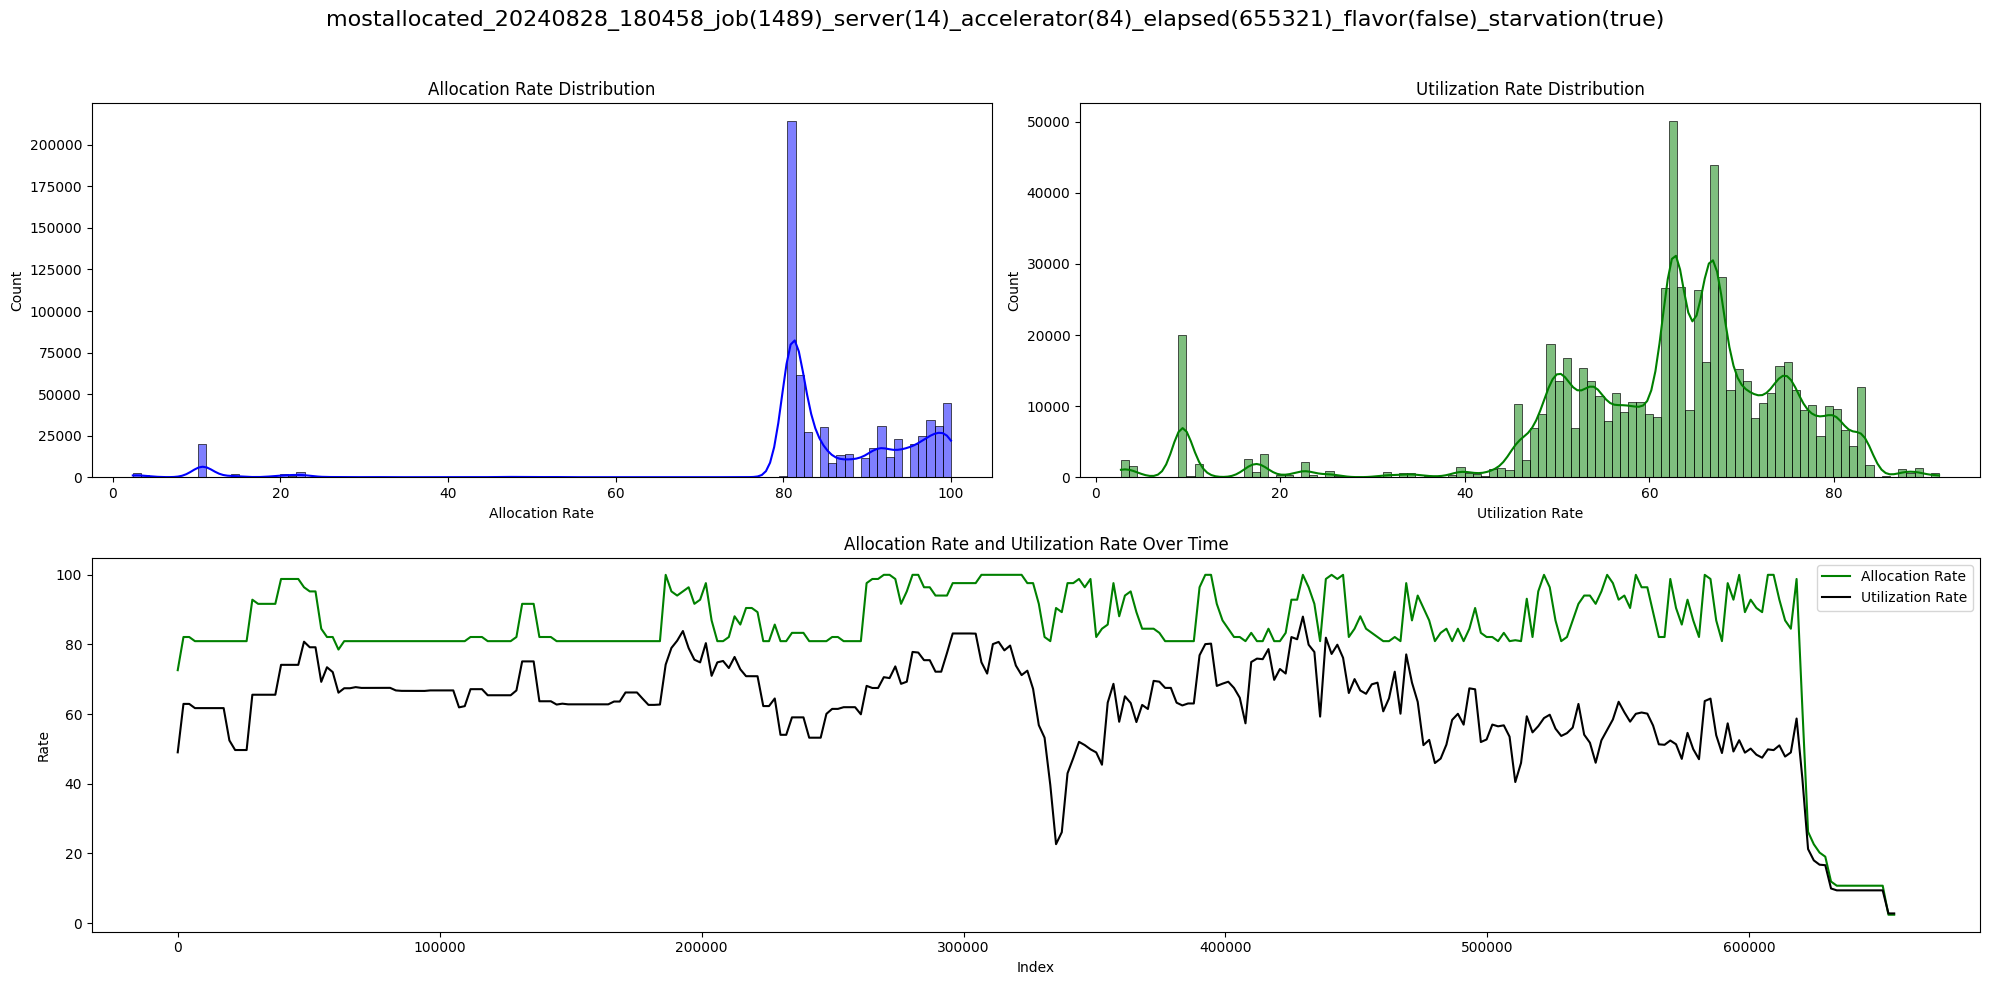

In [3]:
plot_and_show_statistics_("mostallocated_20240828_180458_job(1489)_server(14)_accelerator(84)_elapsed(655321)_flavor(false)_starvation(true).result", 100)

Allocation Rate Statistics:
count    706575.000000
mean         77.630098
std          19.547172
min           2.380950
25%          66.666700
50%          80.952400
75%          94.047600
max         100.000000
Name: Allocation Rate, dtype: float64

Utilization Rate Statistics:
count    706575.000000
mean         54.442645
std          15.857849
min           2.621930
25%          46.899200
50%          52.871400
75%          65.528700
max          93.121000
Name: Utilization Rate, dtype: float64


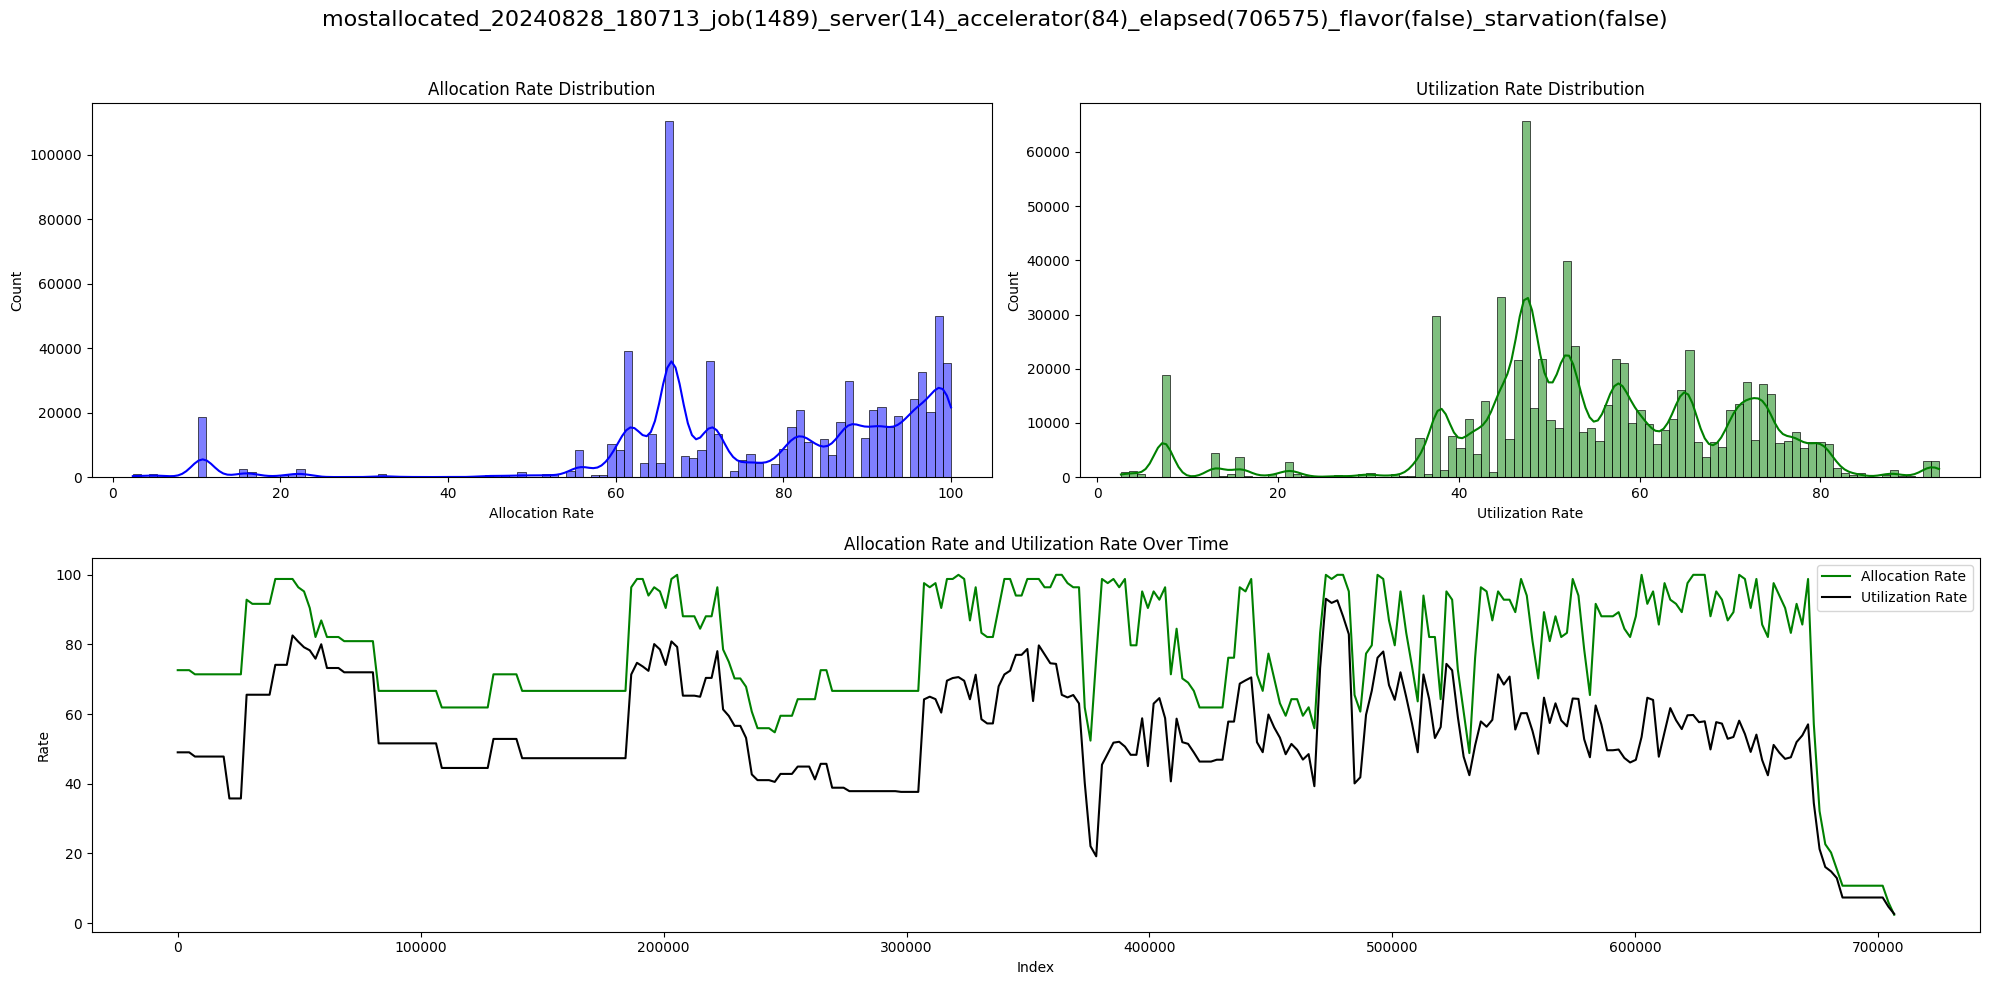

In [4]:
plot_and_show_statistics_("mostallocated_20240828_180713_job(1489)_server(14)_accelerator(84)_elapsed(706575)_flavor(false)_starvation(false).result", 100)

Allocation Rate Statistics:
count    465975.000000
mean         82.042840
std          12.242372
min           9.523810
25%          71.428600
50%          79.761900
75%          94.047600
max         100.000000
Name: Allocation Rate, dtype: float64

Utilization Rate Statistics:
count    465975.000000
mean         61.078921
std          12.952164
min           6.715230
25%          52.628100
50%          58.157500
75%          72.875900
max          93.114400
Name: Utilization Rate, dtype: float64


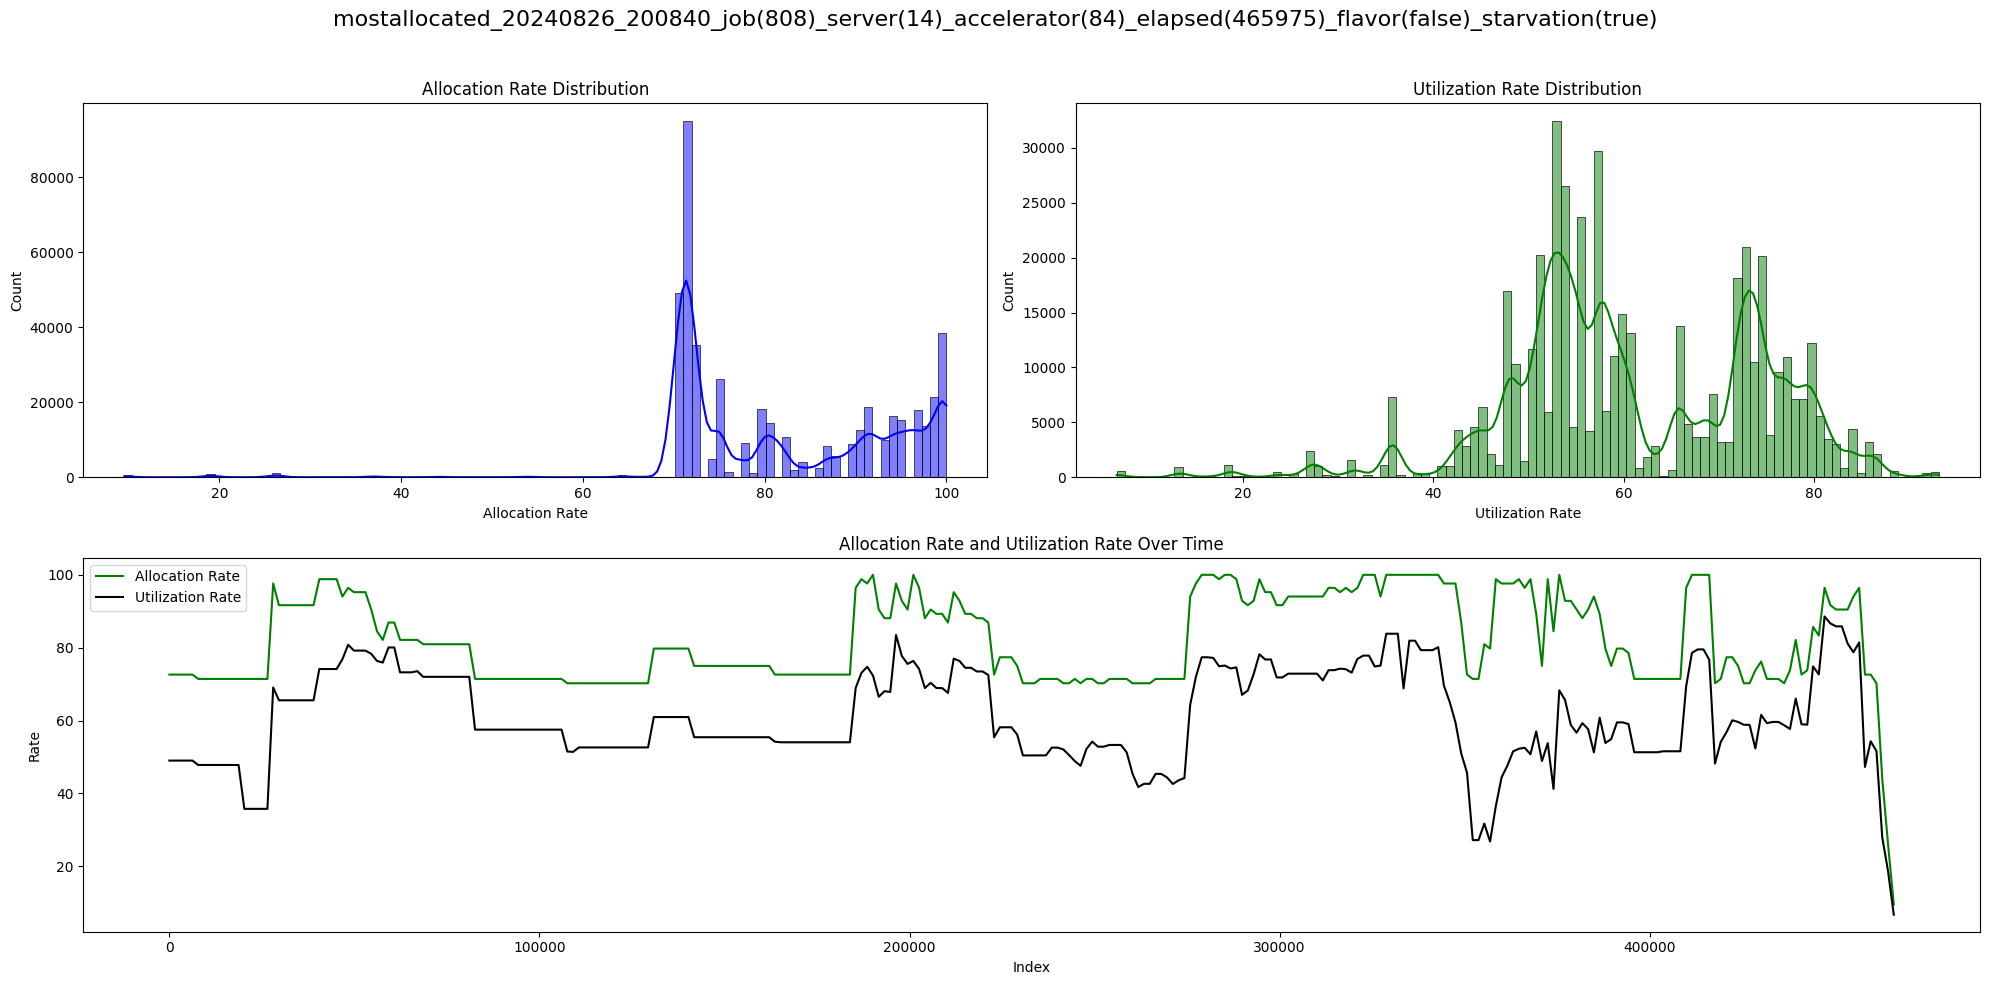

In [7]:
plot_and_show_statistics_("mostallocated_20240826_200840_job(808)_server(14)_accelerator(84)_elapsed(465975)_flavor(false)_starvation(true).result", 100)

Allocation Rate Statistics:
count    426926.000000
mean         89.546929
std          13.284322
min           7.142860
25%          90.476200
50%          90.476200
75%          94.047600
max         100.000000
Name: Allocation Rate, dtype: float64

Utilization Rate Statistics:
count    426926.000000
mean         69.546432
std          13.067846
min           5.317940
25%          70.042600
50%          73.645400
75%          76.268200
max          84.462000
Name: Utilization Rate, dtype: float64


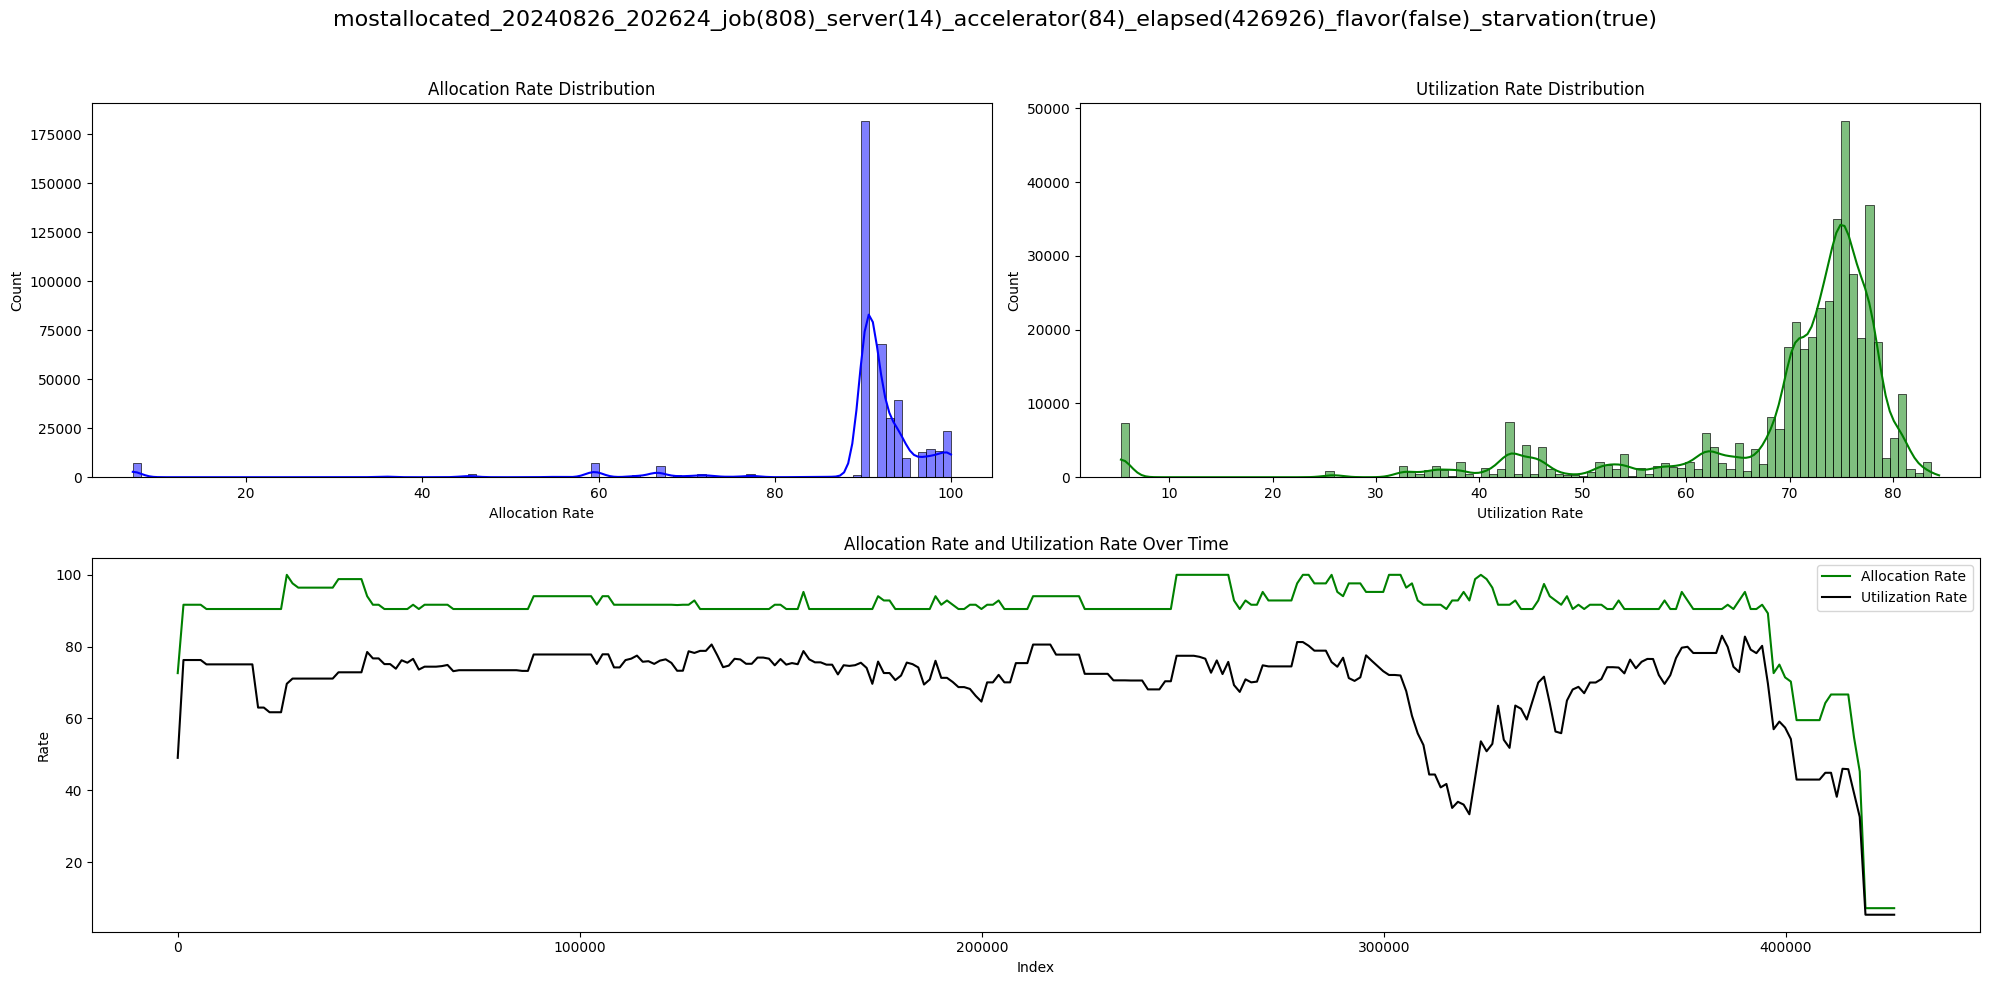

In [8]:
plot_and_show_statistics_("mostallocated_20240826_202624_job(808)_server(14)_accelerator(84)_elapsed(426926)_flavor(false)_starvation(true).result", 100)

Allocation Rate Statistics:
count    409719.000000
mean         93.307632
std          18.387222
min           7.142860
25%          98.809500
50%         100.000000
75%         100.000000
max         100.000000
Name: Allocation Rate, dtype: float64

Utilization Rate Statistics:
count    409719.000000
mean         72.940806
std          17.885698
min           5.291970
25%          70.329700
50%          80.142900
75%          83.930400
max          91.375000
Name: Utilization Rate, dtype: float64


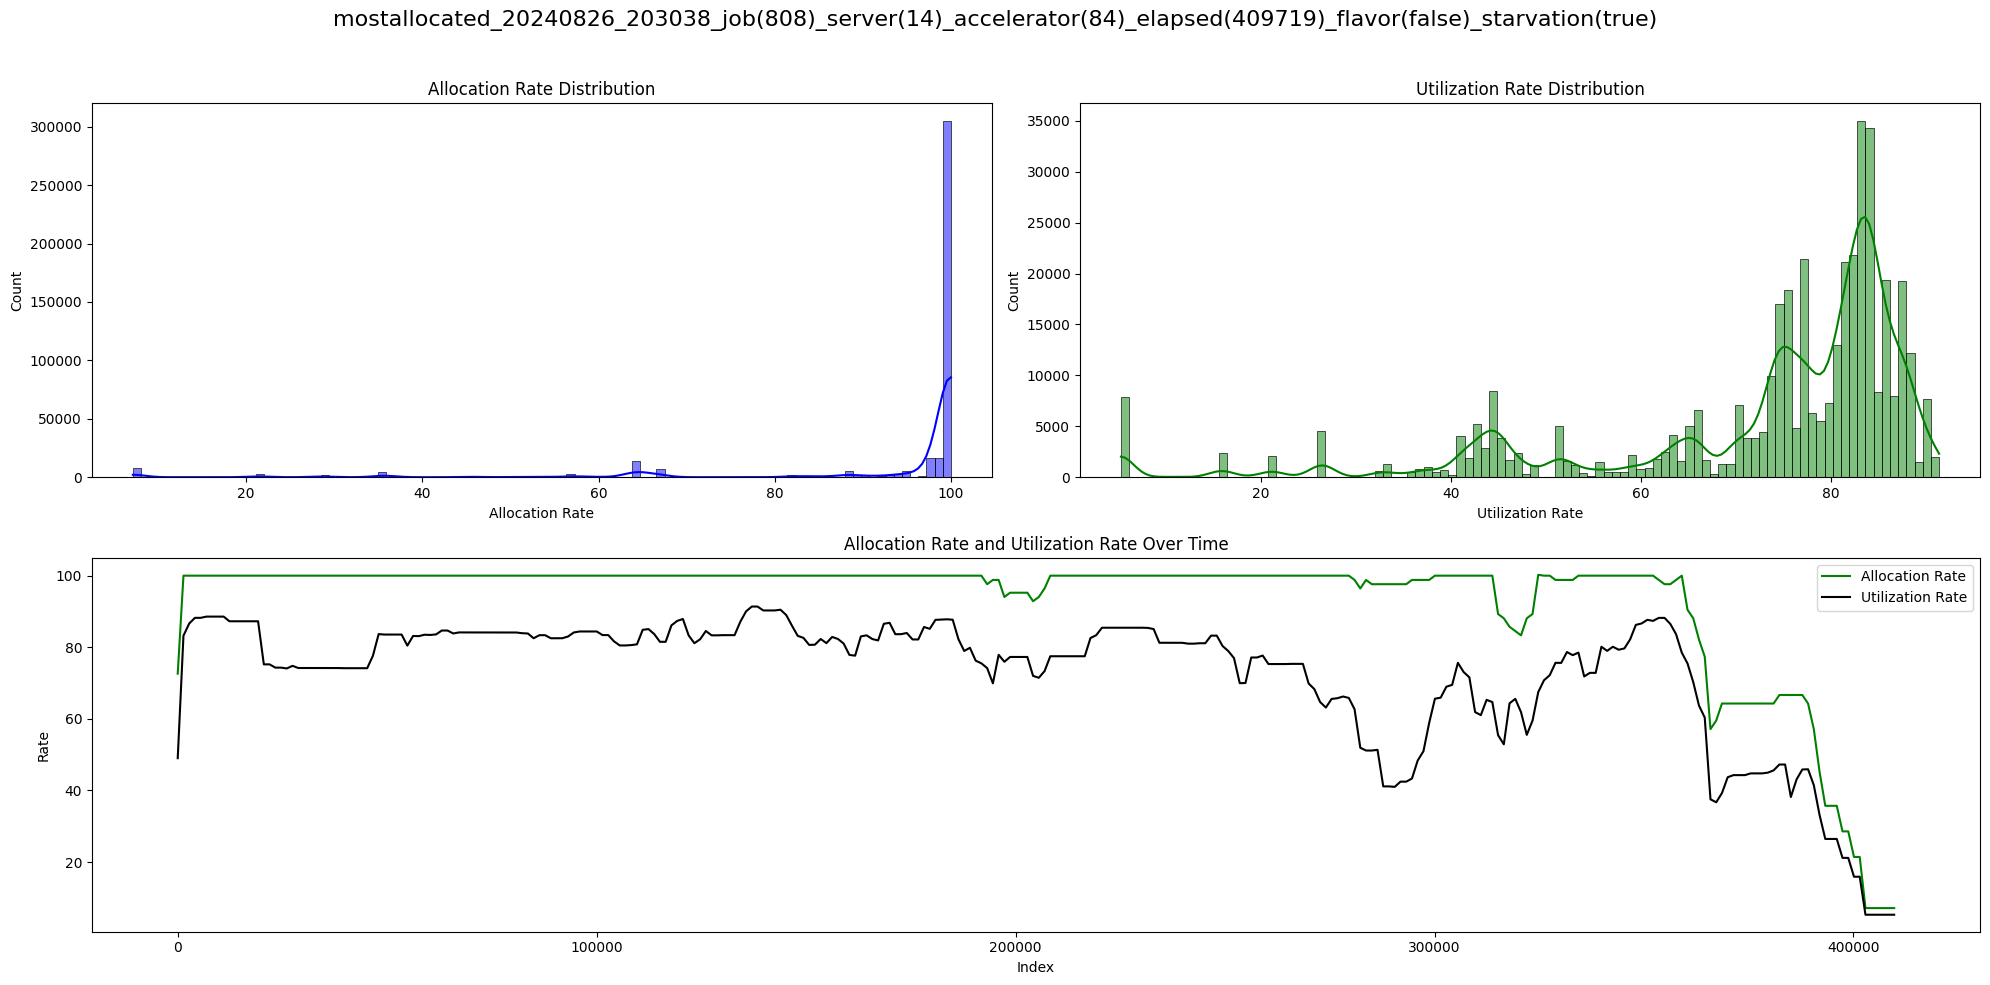

In [9]:
plot_and_show_statistics_("mostallocated_20240826_203038_job(808)_server(14)_accelerator(84)_elapsed(409719)_flavor(false)_starvation(true).result", 100)

Allocation Rate Statistics:
count    243054.000000
mean         66.558630
std          13.624107
min           5.952380
25%          58.333300
50%          63.095200
75%          72.619000
max          97.619000
Name: Allocation Rate, dtype: float64

Utilization Rate Statistics:
count    243054.000000
mean         28.071335
std           8.710017
min           1.674040
25%          22.022000
50%          26.470900
75%          32.568600
max          55.162400
Name: Utilization Rate, dtype: float64


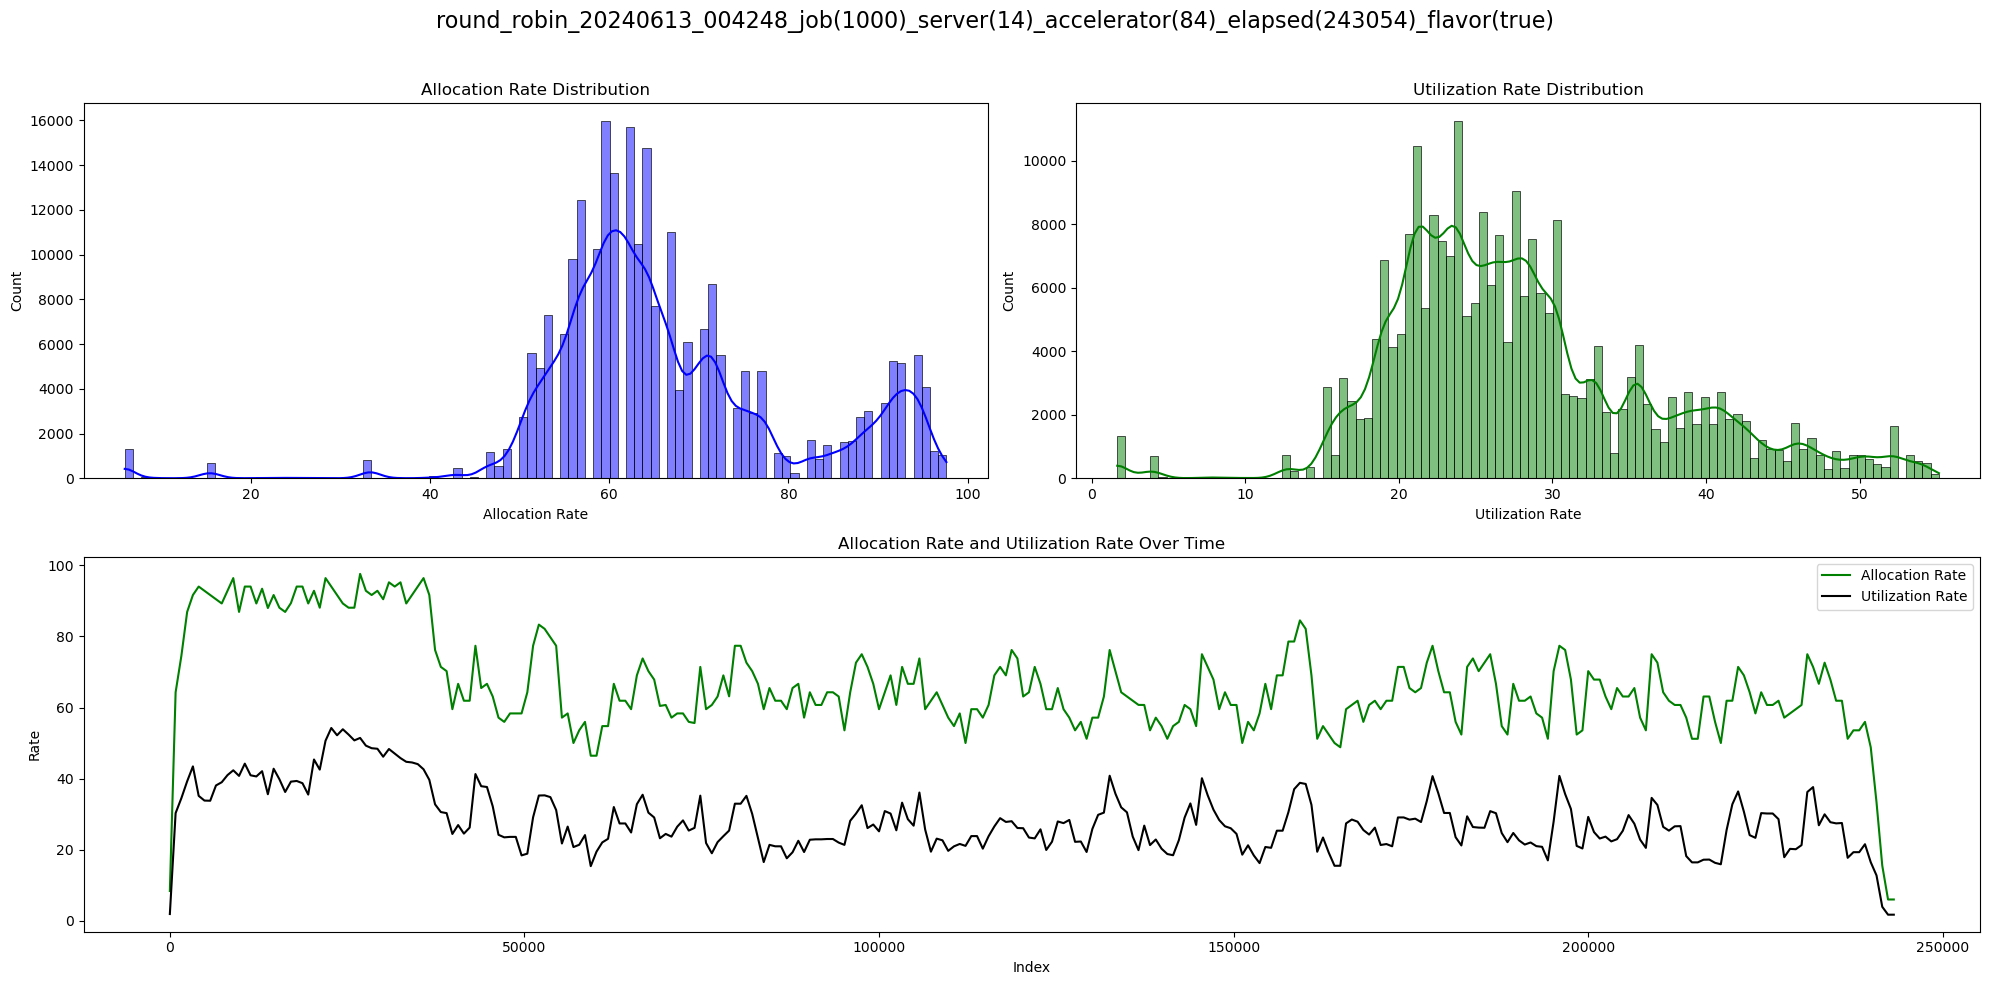

In [29]:
plot_and_show_statistics_("round_robin_20240613_004248_job(1000)_server(14)_accelerator(84)_elapsed(243054)_flavor(true).result", 100)

In [19]:
def plot_and_show_statistics(filename, bin_count):
    # CSV 파일 읽기
    data = pd.read_csv(filename)
    

    
    # 통계적 수치 계산
    allocation_rate_stats = data['Allocation Rate'].describe()
    utilization_rate_stats = data['Utilization Rate'].describe()
    
    print("Allocation Rate Statistics:")
    print(allocation_rate_stats)
    print("\nUtilization Rate Statistics:")
    print(utilization_rate_stats)
    
    # 그림 그릴 준비
    fig, axs = plt.subplots(1, 2, figsize=(20, 7))
    
    # Allocation Rate 히스토그램 및 KDE 그리기
    sns.histplot(data['Allocation Rate'], bins=bin_count, kde=True, ax=axs[0], color='blue')
    axs[0].set_title('Allocation Rate Distribution')
    
    # Utilization Rate 히스토그램 및 KDE 그리기
    sns.histplot(data['Utilization Rate'], bins=bin_count, kde=True, ax=axs[1], color='green')
    axs[1].set_title('Utilization Rate Distribution')
    

    base_filename = os.path.splitext(os.path.basename(filename))[0]
    png_filename = f"{base_filename}.png"
    # 그래프를 png 파일로 저장
    plt.savefig(png_filename)
    plt.show()